# Introduction to Data Analysis with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Handle tabular data with `pandas`

# The Python scientific stack: SciPy

Python Main Data Libraries

NumPy: Base N-dimensional array package

SciPy library: Fundamental library for scientific computing

Matplotlib: Comprehensive 2D Plotting

IPython: Enhanced Interactive Console

Sympy: Symbolic mathematics

pandas: Data structures & analysis

## `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

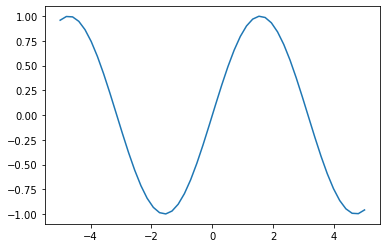

In [9]:
#sine function between -5 and 5

x = np.linspace(-5, 5)
sin = np.sin(x)
plt.plot(x, sin)
plt.show()

## `pandas`

### Getting started with pandas

### `pandas` data structures

### Series

The base pandas abstraction. You can thing of it as the love child of a numpy array and a dictionary.

In [15]:
s = pd.Series([8, 32, 12, 8, 1])
s

0     8
1    32
2    12
3     8
4     1
dtype: int64

In [13]:
pd.Series([8, 32, 12, 8, 1.1]) 
# con poner un valor tipo float guarda todos con el mismo formato

0     8.0
1    32.0
2    12.0
3     8.0
4     1.1
dtype: float64

In [16]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
s.values

array([ 8, 32, 12,  8,  1])

In [18]:
type(s.values)

numpy.ndarray

If we provide an index, pandas will use it. If not, it will automatically create one.

In [20]:
s2 = pd.Series([8, 1, 23, 17, 20], index = ['a', 'b', 'c', 'd', 'e'])
s2

a     8
b     1
c    23
d    17
e    20
dtype: int64

We can create Series from dictionaries:

In [22]:
s3 = pd.Series({'a': 1402.2, 'd': 89, 'e': 1234})
s3

a    1402.2
d      89.0
e    1234.0
dtype: float64

In [23]:
s2.values

array([ 8,  1, 23, 17, 20])

In [24]:
s3.values

array([1402.2,   89. , 1234. ])

In [25]:
s2.values/s3.values
#numpy solo sabe trabajar con cosas alineadas

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

And here is where the magic happens: numpy arrays only identify their contents by position. In contrast, pandas knows their "name" and will align them based on their indexes:

In [30]:
# supongamos s2 como el numero de veces que ha venido un cliente a un restaurante
# supongamos s3 como el gasto total de cada cliente
# numpy no puede hacer la operacion
# pandas si puede trabajar con correlacion de indices

s3/s2

a    175.275000
b           NaN
c           NaN
d      5.235294
e     61.700000
dtype: float64

In [31]:
# puedo hacer todo tipo de operaciones

s + 100

0    108
1    132
2    112
3    108
4    101
dtype: int64

In [32]:
s2 * s3

a    11217.6
b        NaN
c        NaN
d     1513.0
e    24680.0
dtype: float64

In [34]:
s3['e']

1234.0

In [38]:
 s2 % 2 == 0

a     True
b    False
c    False
d    False
e     True
dtype: bool

In [39]:
s2[s2 % 2 == 0]

a     8
e    20
dtype: int64

### DataFrame

This is the object you'll work most of the time with. It represents a table of _m_ observations x _n_ variables. Each variable, or column, is a Series.


```python
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
```

In [42]:
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
df

,province,population,year
0,M,1500000.0,1900
1,M,2000000.0,1950
2,M,3000000.0,2000
3,B,500000.0,1900
4,B,1500000.0,2000


In [44]:
df.population #MAL!!

0    1500000.0
1    2000000.0
2    3000000.0
3     500000.0
4    1500000.0
Name: population, dtype: float64

In [45]:
df['population']

0    1500000.0
1    2000000.0
2    3000000.0
3     500000.0
4    1500000.0
Name: population, dtype: float64

In [48]:
df['2nd language'] = np.nan

In [49]:
df.2nd language # por esto esta mal

SyntaxError: invalid syntax (3322137906.py, line 1)

In [52]:
df['2nd language']

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2nd language, dtype: float64

In [53]:
df.index = list('abcde')
df

,province,population,year,2nd language
a,M,1500000.0,1900,NaN
b,M,2000000.0,1950,NaN
c,M,3000000.0,2000,NaN
d,B,500000.0,1900,NaN
e,B,1500000.0,2000,NaN


In [54]:
df.loc['a']

province                M
population      1500000.0
year                 1900
2nd language          NaN
Name: a, dtype: object

In [57]:
df.iloc[0]

province                M
population      1500000.0
year                 1900
2nd language          NaN
Name: a, dtype: object

In [59]:
df['capital'] = df['province'] == 'M'
df

,province,population,year,2nd language,capital
a,M,1500000.0,1900,NaN,True
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True
d,B,500000.0,1900,NaN,False
e,B,1500000.0,2000,NaN,False


In [68]:
describe = df.describe()
describe

,population,year,2nd language
count,5.000000e+00,5.0,0.0
mean,1.700000e+06,1950.0,NaN
std,9.082951e+05,50.0,NaN
min,5.000000e+05,1900.0,NaN
25%,1.500000e+06,1900.0,NaN
50%,1.500000e+06,1950.0,NaN
75%,2.000000e+06,2000.0,NaN
max,3.000000e+06,2000.0,NaN


In [67]:
describe.loc['max']

population      3000000.0
year               2000.0
2nd language          NaN
Name: max, dtype: float64

### Index objects

Indexes are immutable.

In [69]:
df.index[2] = 'x'

TypeError: Index does not support mutable operations

### Dropping entries from an axis

In [71]:
s2.drop(['a', 'd'])

b     1
c    23
e    20
dtype: int64

By default, `drop()` doesn't modify the original Series- it creates a copy. We can change that with the argument `inplace`.

In [72]:
s2.drop(['a', 'd'], inplace = True)

In [73]:
s2

b     1
c    23
e    20
dtype: int64

### Indexing, selection, and filtering

The key here is that we can build boolean Series that we can use to index the original Series or DataFrame. Those booleans can be combined with bitwise boolean operators (&, |, ~) to get filters that are as complex as we need. 

In [80]:
s[18]

KeyError: 18

In [79]:
s[18:]

Series([], dtype: int64)

In [81]:
s[2]

12

In [87]:
s = pd.Series([5, 8, 2, 1, 0, 7], index = [2, 3, 1, 0, 7, 9])

In [89]:
s[0] # pandas tiende a etiquetar como etiqueta

1

In [90]:
s.loc[0]

1

In [91]:
s.iloc[0]

5

In [93]:
s[s > 4]

2    5
3    8
9    7
dtype: int64

In [96]:
df[df['year'] > 1920]

,province,population,year,2nd language,capital
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True
e,B,1500000.0,2000,NaN,False


In [97]:
post_war = df['year'] > 1920
df[post_war]

,province,population,year,2nd language,capital
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True
e,B,1500000.0,2000,NaN,False


In [98]:
df[['province', 'population', 'year']]

,province,population,year
a,M,1500000.0,1900
b,M,2000000.0,1950
c,M,3000000.0,2000
d,B,500000.0,1900
e,B,1500000.0,2000


In [99]:
df[post_war][['province', 'population', 'year']]

,province,population,year
b,M,2000000.0,1950
c,M,3000000.0,2000
e,B,1500000.0,2000


In [100]:
df[['province', 'population', 'year']][post_war]

,province,population,year
b,M,2000000.0,1950
c,M,3000000.0,2000
e,B,1500000.0,2000


In [106]:
df[df['year'] >= 1950 & df['province'] == 'M'] 
# ojo con los operadores buleanos y los parentesis
# en python tienen mucha prioridad e intenta hacer primero 1950 con provincia


TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [102]:
df[(df['year'] >= 1950) & (df['province'] == 'M')]

,province,population,year,2nd language,capital
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True


### Function application and mapping

Function application and mapping allows us to modify the elements of a DataFrame (columns with apply or elements with applymap) without for loops. This way we are not constrained to the functions already implemented by pandas or numpy.

In [107]:
np.log(df['population'])

a    14.220976
b    14.508658
c    14.914123
d    13.122363
e    14.220976
Name: population, dtype: float64

This is a typical use case for lambdas (anonymous functions)

In [108]:
df

,province,population,year,2nd language,capital
a,M,1500000.0,1900,NaN,True
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True
d,B,500000.0,1900,NaN,False
e,B,1500000.0,2000,NaN,False


In [110]:
df.applymap(lambda cell_value: str(cell_value)[0])
# applymap funciona a nivel celda

,province,population,year,2nd language,capital
a,M,1,1,n,T
b,M,2,1,n,T
c,M,3,2,n,T
d,B,5,1,n,F
e,B,1,2,n,F


In [115]:
df.apply(lambda column: column)
# apply actua columna a columna

,province,population,year,2nd language,capital
a,M,1500000.0,1900,NaN,True
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True
d,B,500000.0,1900,NaN,False
e,B,1500000.0,2000,NaN,False


### Sorting and ranking

In [121]:
df.sort_values('c',ascending=True, axis=1)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

rank() returns the positions of the elements of the Series in its sorted version. If there are ties, it will take averages.

In [122]:
standings = pd.Series({'RM': 45, 'S': 38, 'RV':25, 'FBC':45})

In [124]:
standings.sort_values()

RV     25
S      38
RM     45
FBC    45
dtype: int64

In [125]:
standings.sort_values(ascending = True)

RV     25
S      38
RM     45
FBC    45
dtype: int64

In [131]:
standings.rank(ascending=False, method='min')

RM     1.0
S      3.0
RV     4.0
FBC    1.0
dtype: float64

In [135]:
standings.rank(pct=True).sort_values(ascending=False)

RM     0.875
FBC    0.875
S      0.500
RV     0.250
dtype: float64

#### Exercise

Write a function that takes a Series and returns the top 20% registers. In this case, earners. Test it with this Series:

```python
salaries = pd.Series([10000, 43000, 150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000, 25000])
```

In [189]:
def top_earners(df):
    '''
    Takes a series and returns the top 20%
    '''
    return df[df.rank(pct = True, ascending = False) < 0.2]

In [206]:
def top_earners2(df):
    return df[df.rank().sort_values(ascending=False)[:round(len(salaries)*0.2)].index]

In [207]:
salaries = pd.Series([10000, 43000, 150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000, 25000])

In [208]:
top_earners(salaries)

2    150000
3     90000
4    120000
dtype: int64

In [209]:
top_earners2(salaries)

2    150000
4    120000
3     90000
dtype: int64

## Summarizing and computing descriptive statistics

In [210]:
salaries.min()

5000

In [212]:
salaries.median()

30000.0

In [213]:
salaries.describe()

count        17.000000
mean      45823.529412
std       40942.391378
min        5000.000000
25%       22000.000000
50%       30000.000000
75%       50000.000000
max      150000.000000
dtype: float64

In [214]:
df.min()

province               B
population      500000.0
year                1900
2nd language         NaN
capital            False
dtype: object

In [216]:
# describe solo afecta a tipos numericos, por eso solo aparecen las columnas numericas
df.describe()

,population,year,2nd language
count,5.000000e+00,5.0,0.0
mean,1.700000e+06,1950.0,NaN
std,9.082951e+05,50.0,NaN
min,5.000000e+05,1900.0,NaN
25%,1.500000e+06,1900.0,NaN
50%,1.500000e+06,1950.0,NaN
75%,2.000000e+06,2000.0,NaN
max,3.000000e+06,2000.0,NaN


As with many methods, we can use them in the direction perpendicular to their default.

In [211]:
salaries.max()

150000

In [218]:
df[['population', 'year']].mean(axis=1)

a     750950.0
b    1000975.0
c    1501000.0
d     250950.0
e     751000.0
dtype: float64

### Unique values, value counts, and membership

In [230]:
df['province'].unique()

array(['M', 'B'], dtype=object)

In [231]:
df['province'].nunique()

2

In [222]:
df['province'].value_counts()

M    3
B    2
Name: province, dtype: int64

In [232]:
df['province'].isin(['B', 'Gi', 'Ll', 'T'])

a    False
b    False
c    False
d     True
e     True
Name: province, dtype: bool

In [233]:
cat = df['province'].isin(['B', 'Gi', 'Ll', 'T'])

In [237]:
df['2nd language'][cat] = 'Catalan'

/tmp/ipykernel_2696/2783698042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2nd language'][cat] = 'Catalan'


In [236]:
df

,province,population,year,2nd language,capital
a,M,1500000.0,1900,NaN,True
b,M,2000000.0,1950,NaN,True
c,M,3000000.0,2000,NaN,True
d,B,500000.0,1900,Catalan,False
e,B,1500000.0,2000,Catalan,False


In [238]:
df.nunique()

province        2
population      4
year            3
2nd language    1
capital         2
dtype: int64

#### Exercise

Calculate the %GC of the following DNA sequence:

```python
dna = pd.Series(list('agtcgggaactttctctcgaggagacccaa'))
```

In [285]:
dna = pd.Series(list('agtcgggaactttctctcgaggagacccaa'))

df = pd.DataFrame(dna)
df[(df[0]=='a')|(df[0]=='g')].count()[0]

16

In [283]:
dna.isin(['a', 'g']).sum()

16

## Handling missing data

This is weird... but it has some really good reasons. You can find explanations [here](https://stackoverflow.com/questions/10034149/why-is-nan-not-equal-to-nan) and [here](https://stackoverflow.com/questions/1565164/what-is-the-rationale-for-all-comparisons-returning-false-for-ieee754-nan-values)

### Filtering out missing data

any() and all() are functions of boolean Series. They reduce the Series to a single boolean value by applying repeatedly the operators "or" and "and", respectively.

The thresh argument specifies the minimum number of non-null values required to keep a column (or row, with axis=1)

### Filling in missing data

# Loading and saving data

## Loading CSV

#### Exercise 

Calculate the number of routes to each destination country in the data.

Show all countries with more than 1000 routes.

#### Exercise

Extract the top 10 routes by passenger number. 

I only want to see origin, destination, and number of passengers.

## Saving to Excel

## Saving to CSV

## To Sql Database

## To dictionary and to json

## Reading Excel

## Reading mysql database

# Additional References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

[What is SciPy?](https://www.scipy.org/)

[How can SciPy be fast if it is written in an interpreted language like Python?](https://www.scipy.org/scipylib/faq.html#how-can-scipy-be-fast-if-it-is-written-in-an-interpreted-language-like-python)

[What is the difference between NumPy and SciPy?](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)

[Linear Algebra for AI](https://github.com/fastai/fastai/blob/master/tutorials/linalg_pytorch.ipynb)